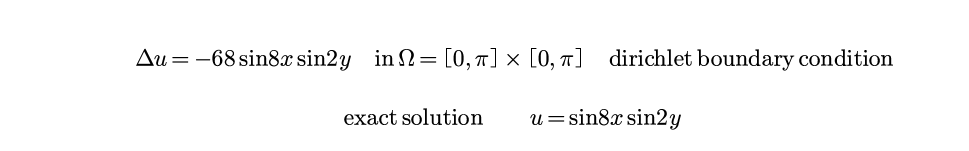

In [2]:
import torch
import torch.nn as nn
from collections import OrderedDict
import numpy as np
# %matplotlib widget
from matplotlib import pyplot as plt
from numpy import matrix as mat
from torch.nn.modules import loss
from functorch import make_functional, vmap, grad, jacrev, hessian
import jax
import time
from matplotlib.ticker import FuncFormatter
pi=np.pi

In [6]:
import plot_l2error
import pinn_lm
import importlib
importlib.reload(plot_l2error)
importlib.reload(pinn_lm)
# 创建一个空字典来存储损失数组
pi=np.pi
cate_num=1
loss_dict = {}
vic_time=np.zeros(cate_num)
torch.cuda.empty_cache() 
avg_time=np.zeros(cate_num)
error=np.zeros(cate_num)
for j in range(cate_num):
    pinns_ran=pinn_lm.PINN_LM()
    pinns_ran.new_sampling(10)
    %matplotlib agg
    if j<3 :
        for i in range(20):
                pinns_ran.new_sampling(i)
                pinns_ran.LM(1980,100,True) 
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')  
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break        
    else:
        for i in range(3): 
                pinns_ran.LM(920,500,True)
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break
    %matplotlib inline
    avg_time[j]=pinns_ran.avg_time/pinns_ran.time_iter
    error[j]=plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')
    if j<3:
        loss_dict[f"loss {j} params"]=pinns_ran.loss_record
    else:
        loss_dict[f"loss {j} big params"]=pinns_ran.loss_record
x_axis=np.arange(20,920+45,45)

model # of parameters 1980
begin a new iteration
steps  1 accept move
Loss = 974.6325604645388 Loss new= 974.5234596799874
Elapsed: 0.0ms
steps  2 accept move
Loss = 974.5234596799874 Loss new= 973.9992857058596
Elapsed: 1055.5ms
steps  3 accept move
Loss = 973.9992857058596 Loss new= 971.6977321352076
Elapsed: 1060.8ms
steps  5 accept move
Loss = 971.6977321352076 Loss new= 968.7912008897549
Elapsed: 986.9ms
steps  7 accept move
Loss = 968.7912008897549 Loss new= 963.0620347682509
Elapsed: 1019.7ms
steps  9 accept move
Loss = 963.0620347682509 Loss new= 950.5276180867559
Elapsed: 1040.4ms
reject move
steps  11 accept move
Loss = 950.5276180867559 Loss new= 930.6723184567958
Elapsed: 993.6ms
steps  13 accept move
Loss = 930.6723184567958 Loss new= 917.5002403590216
Elapsed: 974.8ms
steps  15 accept move
Loss = 917.5002403590216 Loss new= 908.6345129904134
Elapsed: 964.8ms
steps  17 accept move
Loss = 908.6345129904134 Loss new= 900.7888934242424
Elapsed: 1023.1ms
steps  19 accept move


OutOfMemoryError: CUDA out of memory. Tried to allocate 30.00 MiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 11.78 GiB is allocated by PyTorch, and 649.76 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import plot_loss
import importlib
importlib.reload(plot_loss)

loss=[]
label=[]
i=0
true=True
for key, value in loss_dict.items():
    i=i+1
    if true:
        loss.append(value)
        label.append(key)
random_colors = plot_loss.generate_distinguishable_colors(len(loss))
plot_loss.plot_losses(loss,label,random_colors,'--')

error 1.0508523120789366


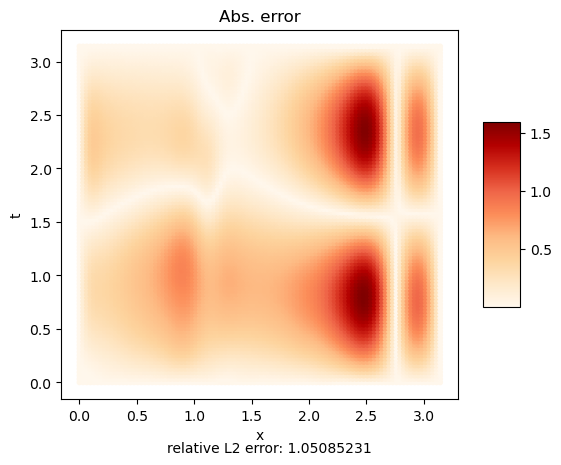

'1.05085231'

In [11]:
%matplotlib inline
plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')

In [ ]:
import plot_l2error
import possion30
import importlib
importlib.reload(plot_l2error)
importlib.reload(possion30)
# 创建一个空字典来存储损失数组
pi=np.pi
cate_num=5
loss_dict = {}
vic_time=np.zeros(cate_num)
torch.cuda.empty_cache() 
avg_time=np.zeros(cate_num)
error=np.zeros(cate_num)
for j in range(cate_num):
    pinns_ran=pinn_lm.PINN_LM()
    pinns_ran.new_sampling(10)
    %matplotlib agg
    if j<3 :
        for i in range(20):
                pinns_ran.new_sampling(i)
                pinns_ran.LM(1980,100,True) 

                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')  
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break        
    else:
        for i in range(3): 
                pinns_ran.LM(920,500,True)
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break
    %matplotlib inline
    avg_time[j]=pinns_ran.avg_time/pinns_ran.time_iter
    error[j]=plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')
    if j<3:
        loss_dict[f"loss {j} params"]=pinns_ran.loss_record
    else:
        loss_dict[f"loss {j} big params"]=pinns_ran.loss_record
x_axis=np.arange(20,920+45,45)